[*********************100%%**********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2594 entries, 2014-03-27 to 2024-07-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2594 non-null   float64
 1   High       2594 non-null   float64
 2   Low        2594 non-null   float64
 3   Close      2594 non-null   float64
 4   Adj Close  2594 non-null   float64
 5   Volume     2594 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 141.9 KB
40.0
2004 0
2005 0
2006 0
2007 0
2008 0
2009 0
2010 0
2011 0
2012 0
2013 0
2014 194
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 136
(1745, 100, 1)
(1745, 1)
(749, 100, 1)
(749, 1)



Epoch 1/2

1745/1745 [==============================] - 130s 72ms/step - loss: 6.0275e-04
Epoch 2/2
1745/1745 [==============================] - 127s 73ms/step - loss: 2.3461e-04
Model: "sequential"
_________________________________________________________________
 Layer (type) 

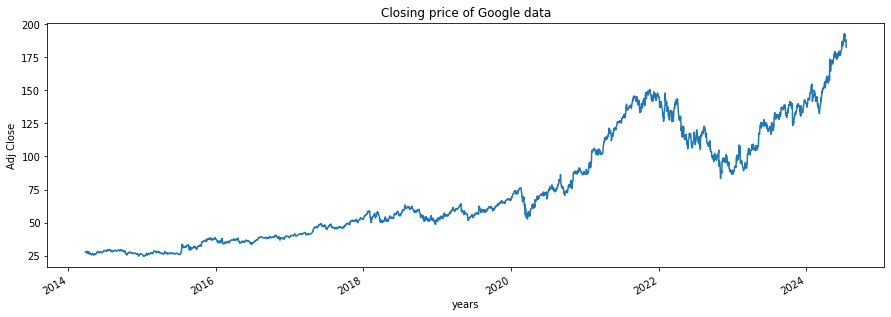

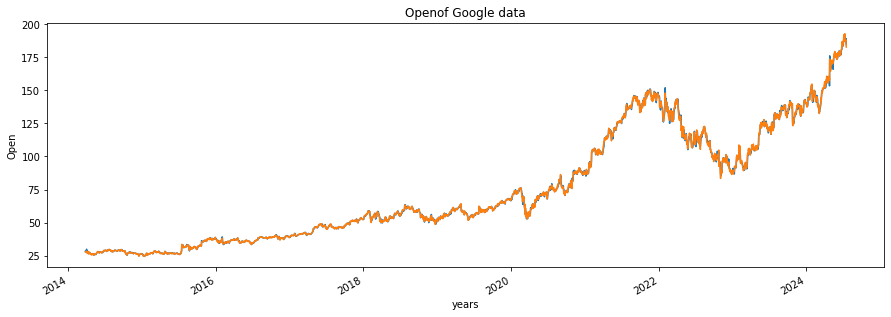

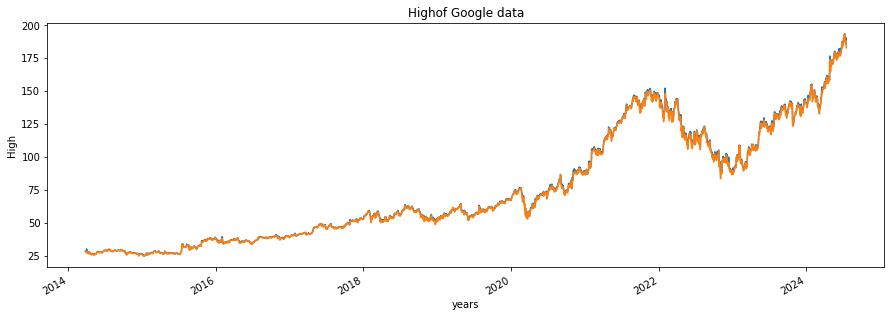

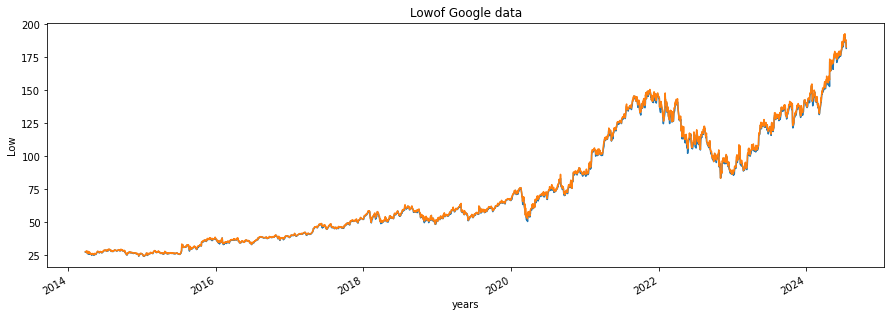

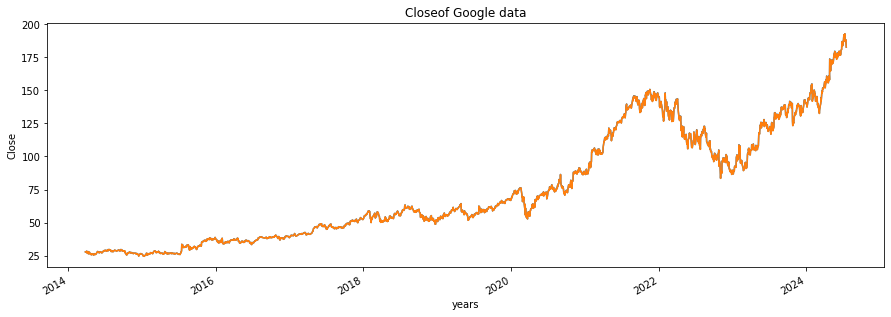

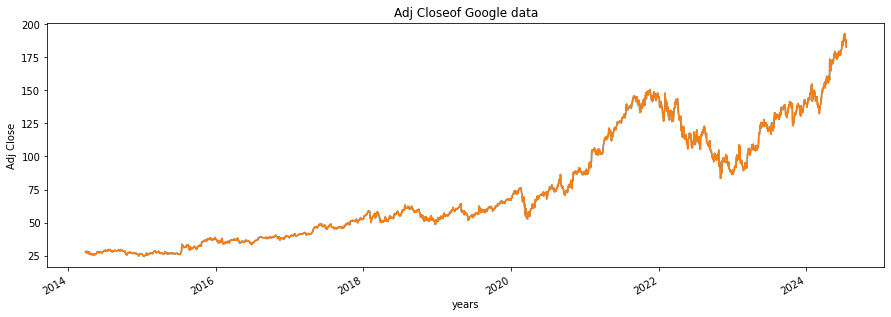

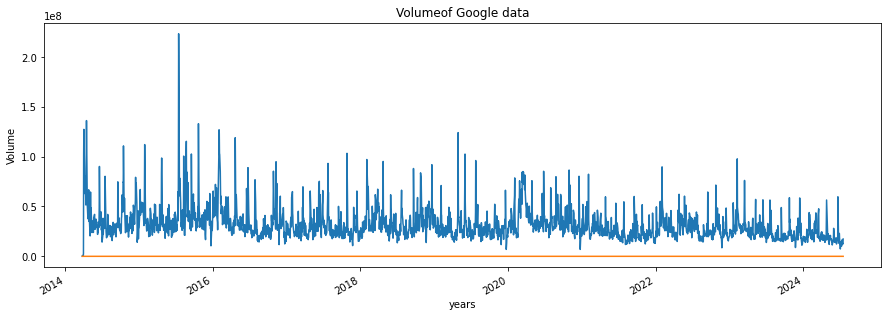

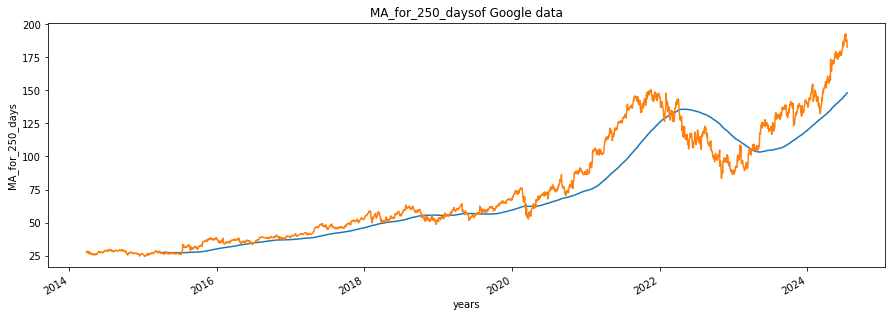

<Figure size 432x288 with 0 Axes>

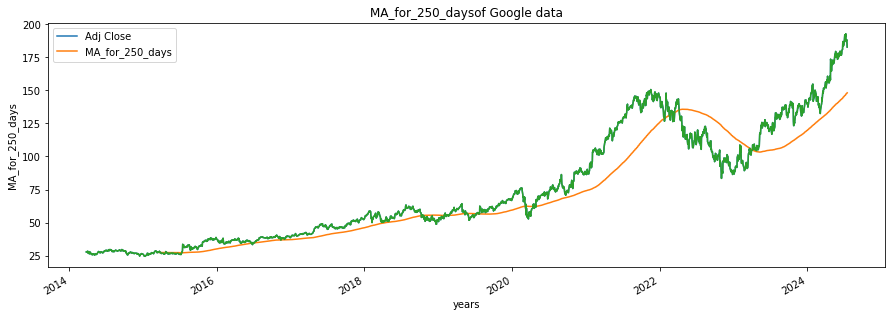

<Figure size 432x288 with 0 Axes>

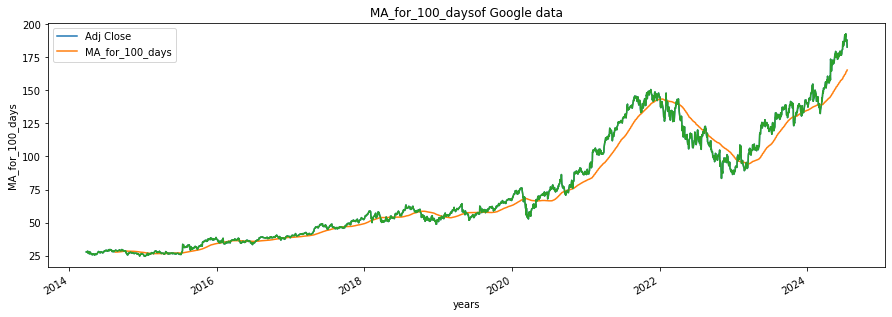

<Figure size 432x288 with 0 Axes>

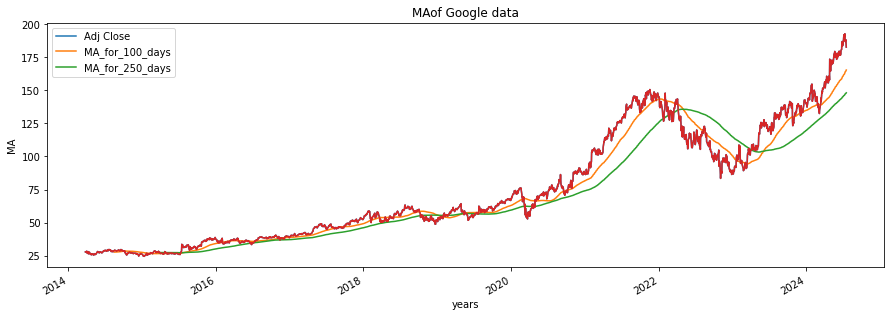

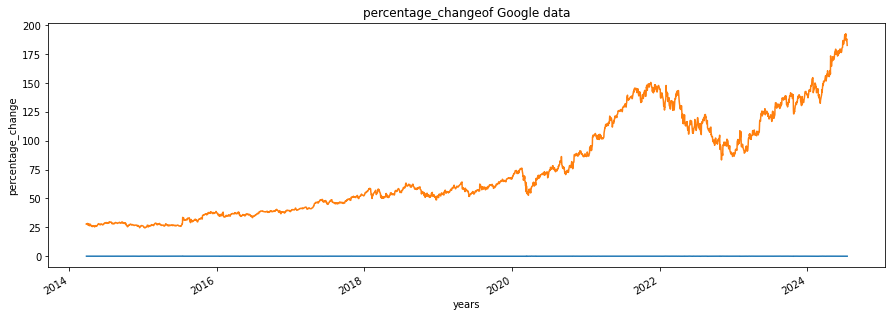

<Figure size 432x288 with 0 Axes>

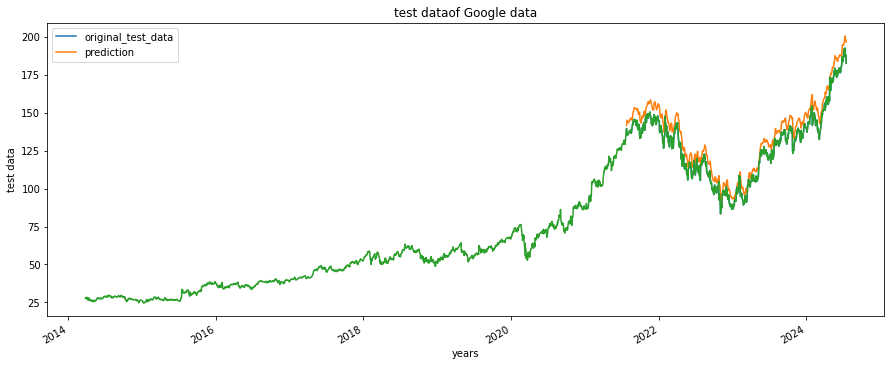

<Figure size 432x288 with 0 Axes>

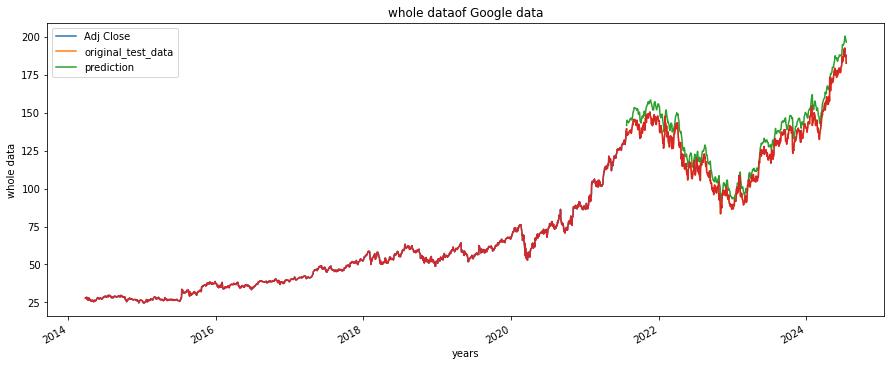

In [3]:
# pip install yfinance 

import yfinance as yf

from datetime import datetime
end = datetime.now()
start = datetime(end.year-20,end.month,end.day)

stock = 'GOOG'
google_data = yf.download(stock,start,end)

google_data.head() #first five data og google

# Adj Close price is more accurate than close price

google_data.shape #give rows , column

google_data.describe() #statistical summary 

google_data.info() #give info about datatype and null attributes 

google_data.isna().sum() # means good data ,clean dataset {it is used to find the null values or empty sets}

import matplotlib.pyplot as plt  #matplot lib used to plot various charts and graphs
%matplotlib inline

plt.figure(figsize= (15,5)) #frame type ka sa bana deta hai
google_data['Adj Close'].plot()
plt.xlabel('years')
plt.ylabel('Adj Close')
plt.title('Closing price of Google data')

def plot_graph(figsize,values,column_name):
    plt.figure()
    values.plot(figsize = figsize)
    google_data['Adj Close'].plot()
    plt.xlabel('years')
    plt.ylabel(column_name)
    plt.title(f'{column_name}of Google data')

google_data.columns

for column in google_data.columns:
    plot_graph((15,5),google_data[column],column)
    

temp_data = [10,20,30,40,50,60,70,80,90,100]
print(sum(temp_data[1:6])/5)   #

import pandas as pd
data = pd.DataFrame([10,20,30,40,50,60,70,80,90,100]) # It consists of rows and columns, where each column can be of a different data type
data.head()

data['MA'] = data.rolling(5).mean()
data
# The rolling() function in Pandas is used to create a rolling window object 
# for a DataFrame or a Series. This rolling window object can then be used to 
# perform rolling window calculations, such as rolling mean, rolling sum, rolling standard deviation, etc.
#As you can see, the first four values are NaN because there aren't enough data points to compute the rolling mean over a window of 5.

# using this moving average concept we will predict stock data
# we will take first 10 ,20 or 100 days data to train the neural network for next day close price

for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

google_data['MA_for_250_days']

plot_graph((15,5),google_data['MA_for_250_days'],'MA_for_250_days')

plot_graph((15,5),google_data[['Adj Close','MA_for_250_days']],'MA_for_250_days')

google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5),google_data[['Adj Close','MA_for_100_days']],'MA_for_100_days')

# above is moving average of 100 days

plot_graph((15,5),google_data[['Adj Close','MA_for_100_days','MA_for_250_days']],'MA')

# Percentage change []

google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']]

plot_graph((15,5),google_data['percentage_change_cp'],'percentage_change')

Adj_close_price = google_data[['Adj Close']]

max(Adj_close_price.values),min(Adj_close_price.values)

# convert into 0 to 1

from sklearn.preprocessing import MinMaxScaler 
# data of various range it make all the data in range of 0-1

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

len(scaled_data)

x_data = []
y_data = []

for i in range(100,len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data,y_data = np.array(x_data),np.array(y_data)


x_data[0],y_data[0]

# dividing the testing data and training data

int(len(x_data)*0.7)

4966-100-int(len(x_data)*0.7)  #removed first 100 days as they are null

splitting_len = int(len(x_data)*0.7)

x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]
 
x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# using keras

from keras.models import Sequential
from keras.layers import Dense ,LSTM

model = Sequential()  # here it is to transport the data to input layer to series of layer thrn to output layer
model.add(LSTM(128 , return_sequences = True , input_shape = (x_train.shape[1],1))) # true for sequence of layer
model.add(LSTM(64,return_sequences = False)) # False coz not a sequence layer
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(x_train,y_train,batch_size = 1,epochs = 2) 

model.summary()

predictions = model.predict(x_test)

predictions

inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

rmse = np.sqrt(np.mean((inv_predictions - inv_y_test)**2))

rmse

plotting_data = pd.DataFrame(
{
    'original_test_data': inv_y_test.reshape(-1),
    'prediction': inv_predictions.reshape(-1)
    
},
    index = google_data.index[splitting_len+100:]
    
)
plotting_data.head()

plot_graph((15,6),plotting_data,'test data')

plot_graph((15,6),pd.concat([Adj_close_price[:splitting_len+100],plotting_data],axis = 0),'whole data')

model.save('Latest_stock_price_model.keras')



